In [56]:
import pandas as pd
import numpy as np

from sklearn import metrics   #Additional sklearn functions
from sklearn.model_selection import GridSearchCV   #Performing grid search

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 4
rcParams['figure.dpi'] = 150

In [57]:
data = pd.read_csv('malicious.csv')
train = pd.get_dummies(data=data, columns=["CHARSET", "SERVER", "WHOIS_COUNTRY", "WHOIS_STATEPRO"])
train = train[train["APP_PACKETS"] > 0].dropna(axis=0)._get_numeric_data()
target = "Type"
IDcol = "ID"

In [58]:
list(train)

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type',
 'CHARSET_ISO-8859',
 'CHARSET_ISO-8859-1',
 'CHARSET_None',
 'CHARSET_UTF-8',
 'CHARSET_iso-8859-1',
 'CHARSET_us-ascii',
 'CHARSET_utf-8',
 'CHARSET_windows-1251',
 'CHARSET_windows-1252',
 'SERVER_.V01 Apache',
 'SERVER_294',
 'SERVER_ATS',
 'SERVER_ATS/5.3.0',
 'SERVER_Aeria Games & Entertainment',
 'SERVER_AkamaiGHost',
 'SERVER_AmazonS3',
 'SERVER_Apache',
 'SERVER_Apache-Coyote/1.1',
 'SERVER_Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b',
 'SERVER_Apache/1.3.27 (Unix) PHP/4.4.1',
 'SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20',
 'SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8',
 'SERVER_Apache/1.3.3

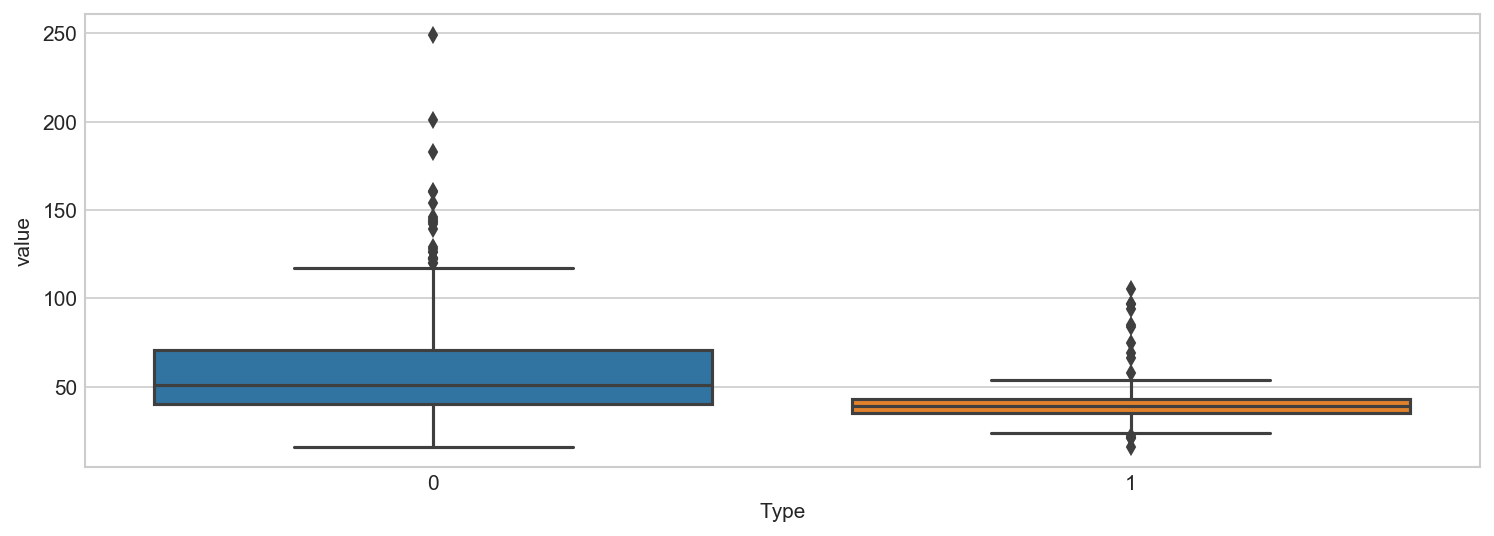

In [59]:
dd=pd.melt(train,id_vars=['Type'],value_vars=['URL_LENGTH'])
sns.boxplot(x='Type',y='value',data=dd)

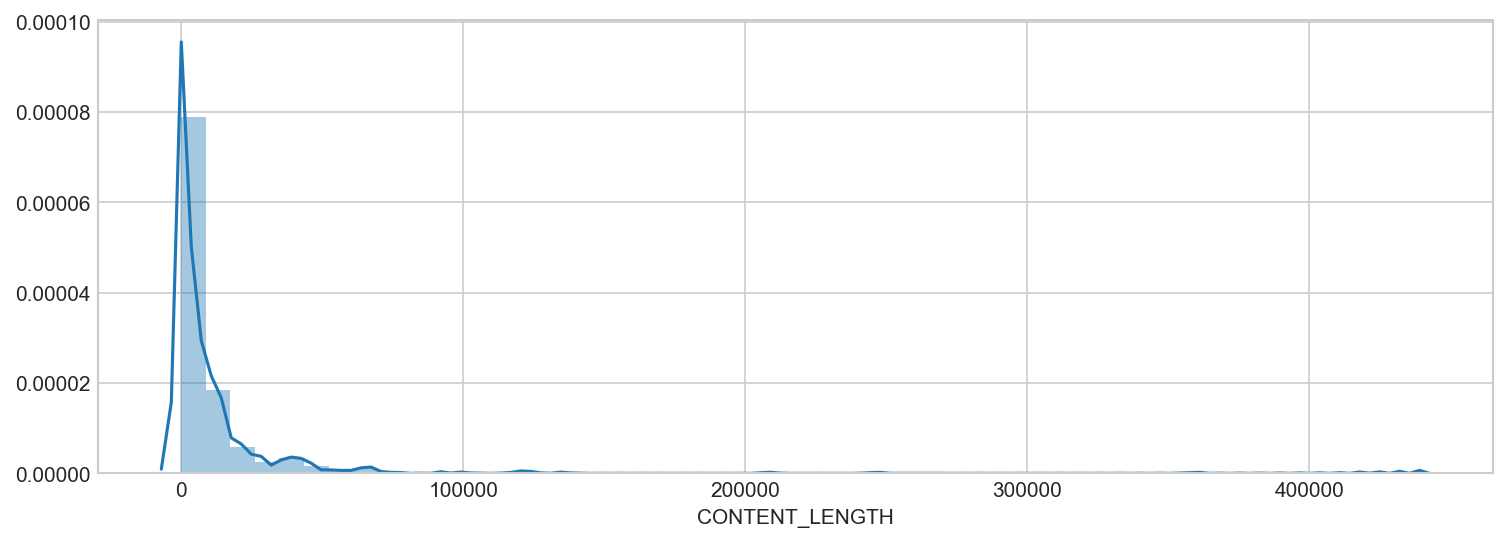

In [109]:
sns.distplot(train['CONTENT_LENGTH'])

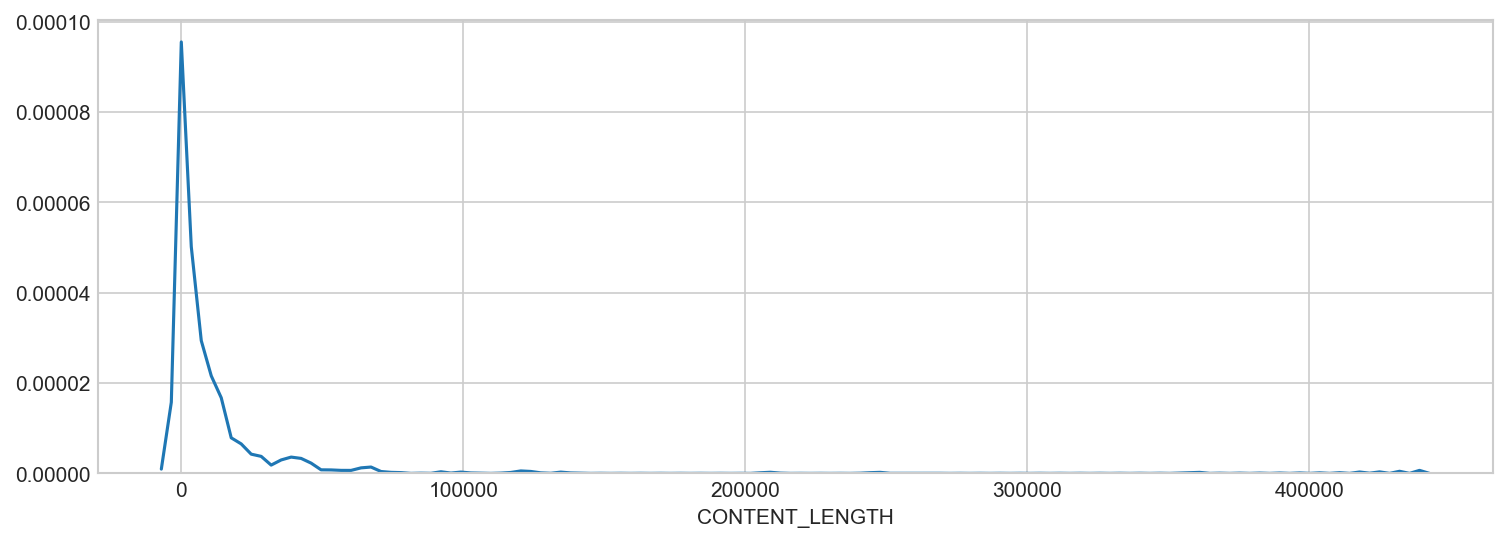

In [111]:
sns.distplot(train['CONTENT_LENGTH'], hist=False);

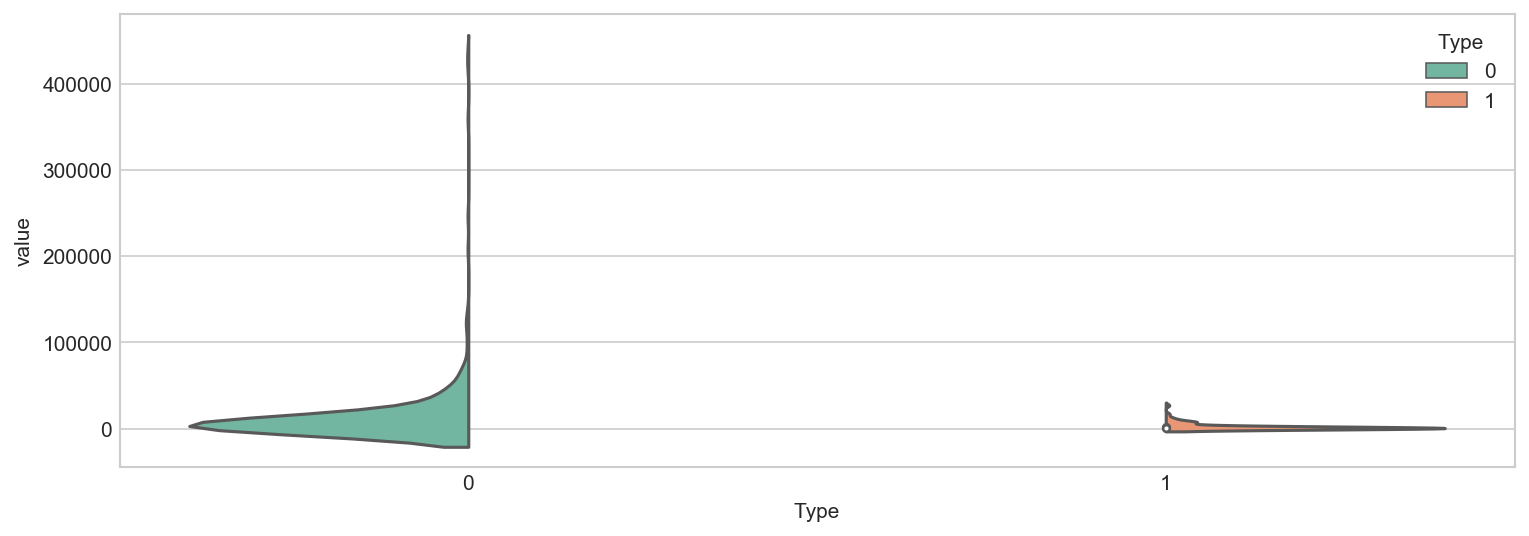

In [83]:
dd1=pd.melt(train,id_vars=['Type'],value_vars=['CONTENT_LENGTH'])
sns.set_style("whitegrid")
sns.violinplot(y ='value', x ='Type', hue="Type",palette="Set2", data=dd1, scale="count", split = True)

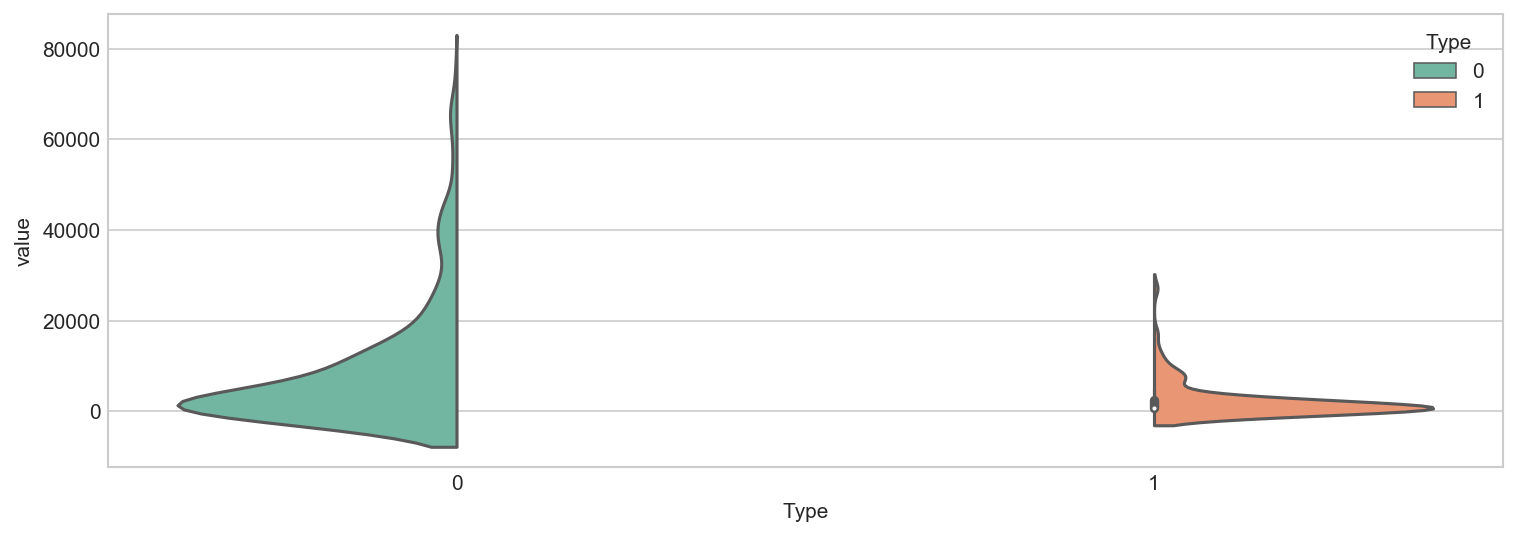

In [104]:
trainnew = train[train['CONTENT_LENGTH'] <= 90000]
dd2 = pd.melt(trainnew,id_vars=['Type'],value_vars=['CONTENT_LENGTH'])
sns.set_style("whitegrid")
sns.violinplot(y ='value', x ='Type', hue="Type",palette="Set2", data=dd2, scale="count", split = True)

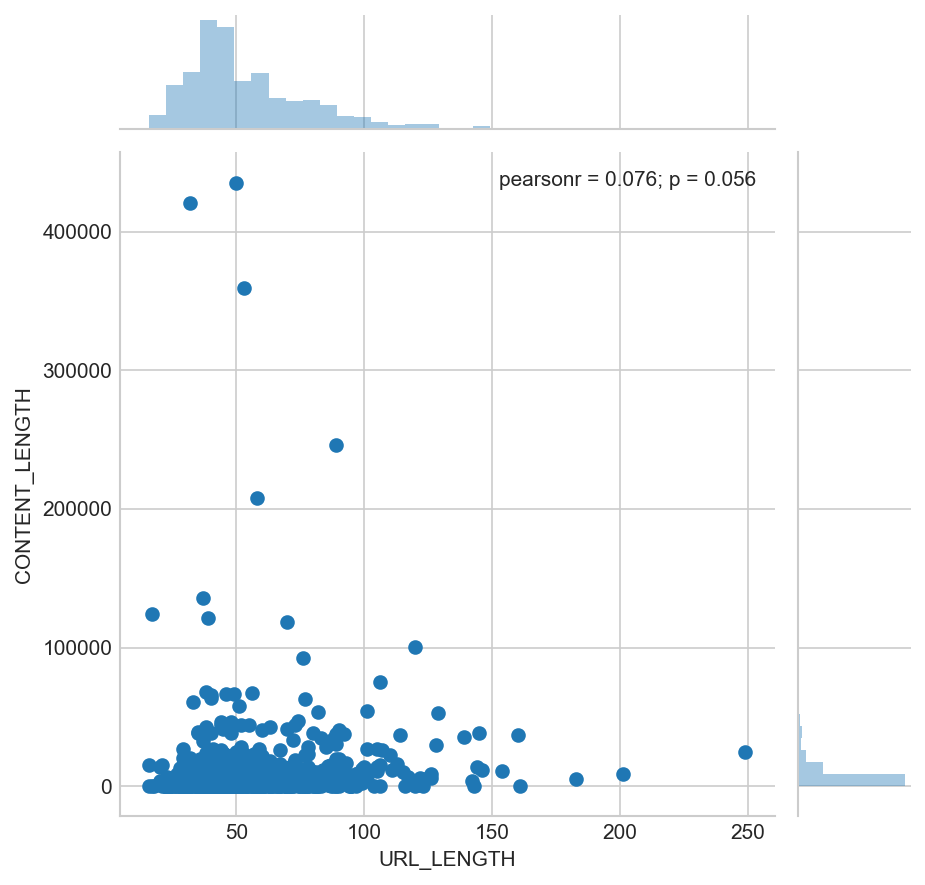

In [112]:
sns.jointplot(x="URL_LENGTH", y="CONTENT_LENGTH", data=train);

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


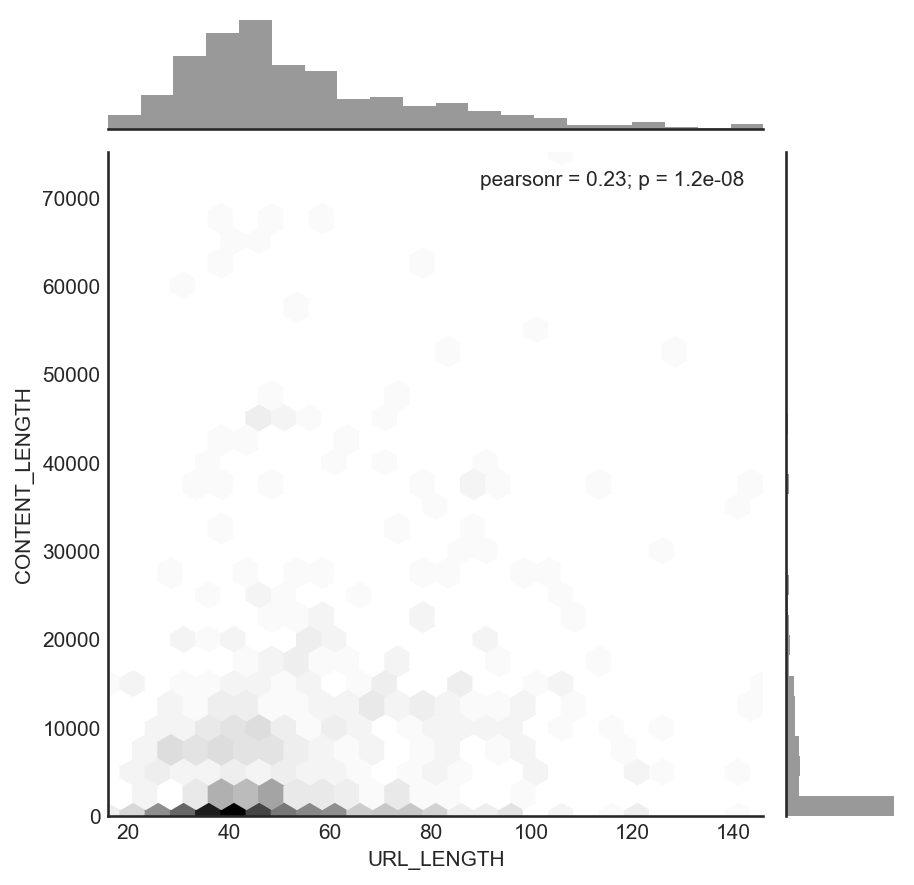

In [123]:
trainnew = train[train['CONTENT_LENGTH'] <= 90000]
trainnew = trainnew[train['URL_LENGTH']<=150]
with sns.axes_style("white"):
    sns.jointplot(x=trainnew['URL_LENGTH'], y=trainnew['CONTENT_LENGTH'], kind="hex",color = 'k');

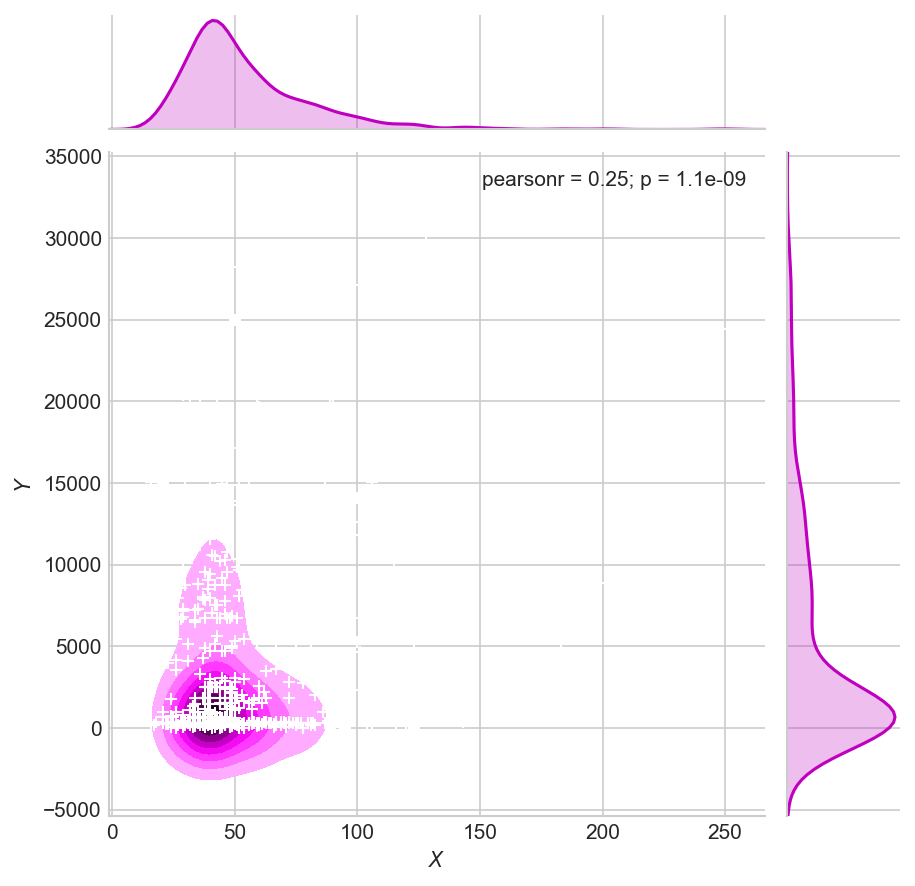

In [143]:
trainnew1 = train[train['CONTENT_LENGTH'] <= 30000]
g = sns.jointplot(x="URL_LENGTH", y="CONTENT_LENGTH", data=trainnew1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

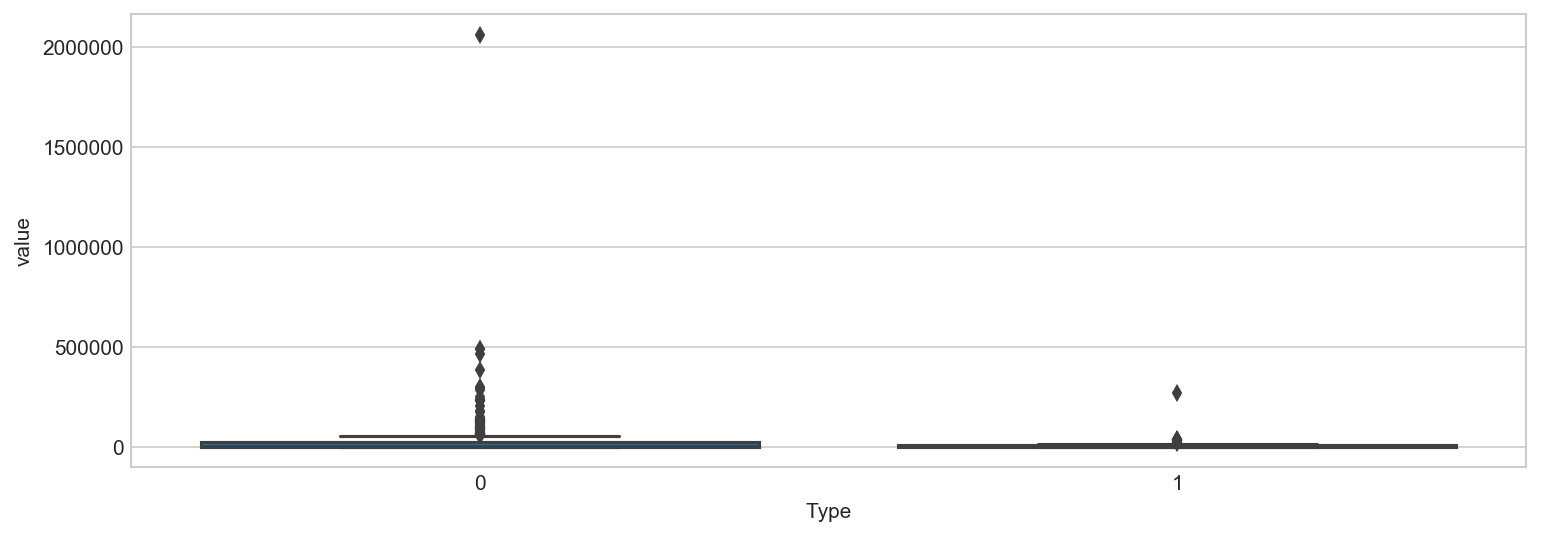

In [147]:
dd=pd.melt(train,id_vars=['Type'],value_vars=['SOURCE_APP_BYTES'])
sns.boxplot(x='Type',y='value',data=dd)

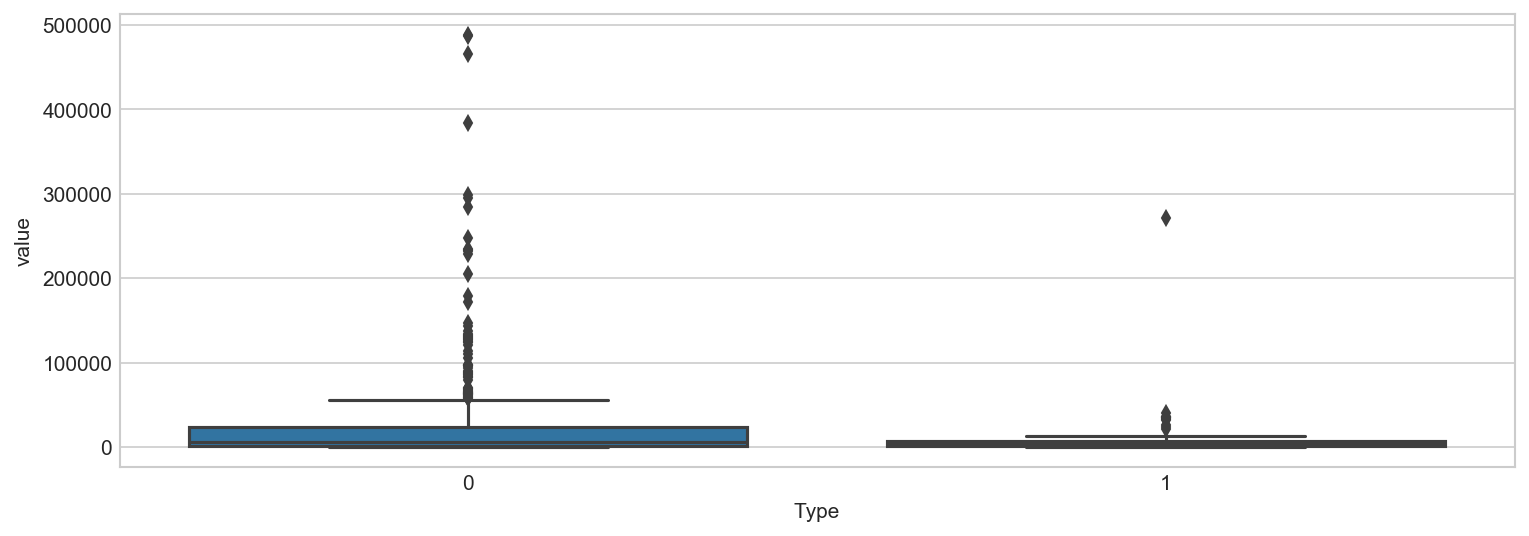

In [148]:
train_bytes = train[train['SOURCE_APP_BYTES']<=505000]
dd=pd.melt(train_bytes,id_vars=['Type'],value_vars=['SOURCE_APP_BYTES'])
sns.boxplot(x='Type',y='value',data=dd)

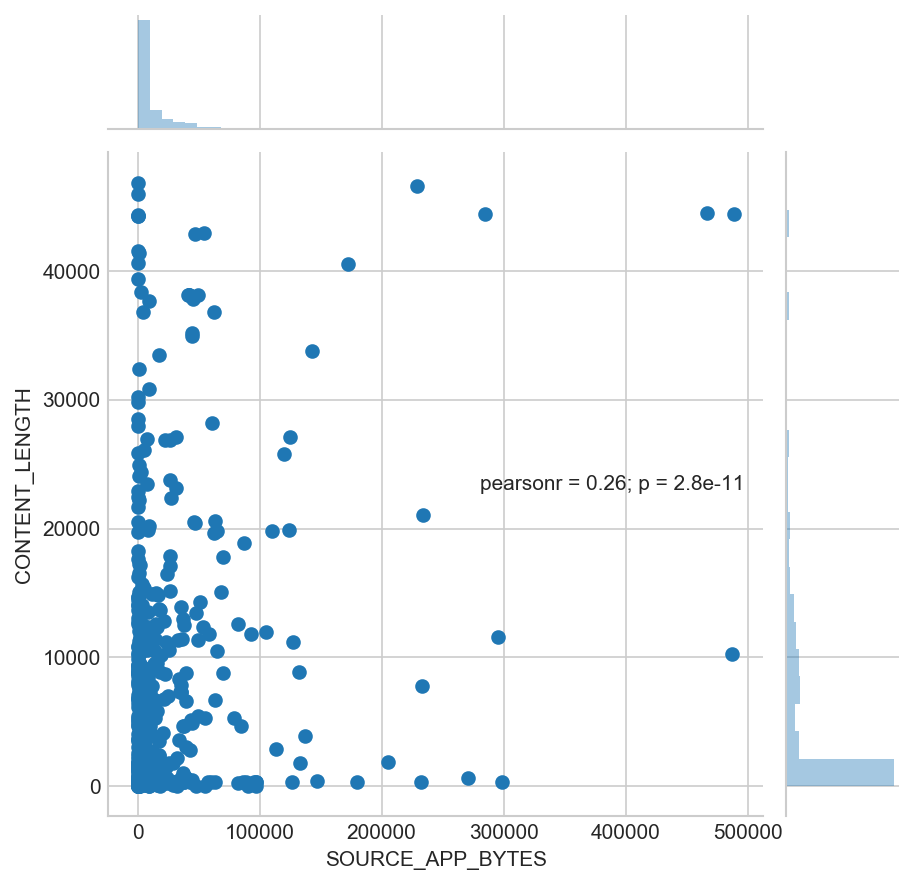

In [150]:
train_bytes_content = train_bytes[train_bytes['CONTENT_LENGTH']<50000]
sns.jointplot(x="SOURCE_APP_BYTES", y="CONTENT_LENGTH", data=train_bytes_content);

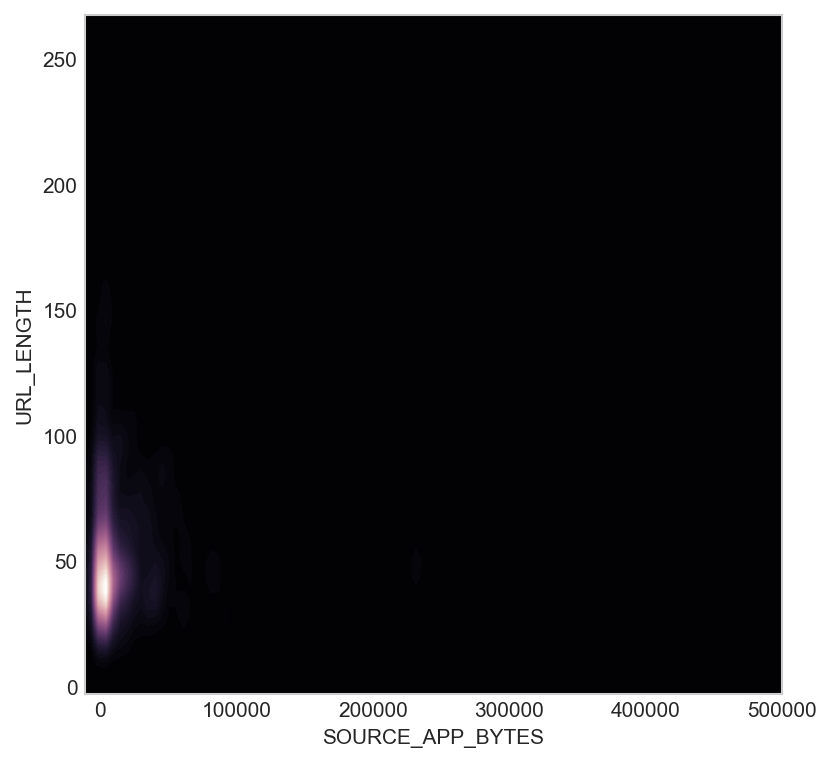

In [153]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(train_bytes_content['SOURCE_APP_BYTES'],train_bytes_content['URL_LENGTH'],  cmap=cmap, n_levels=60, shade=True);

#sns.jointplot(x="", y="CONTENT_LENGTH", data=train_bytes_content, kind="kde");
b

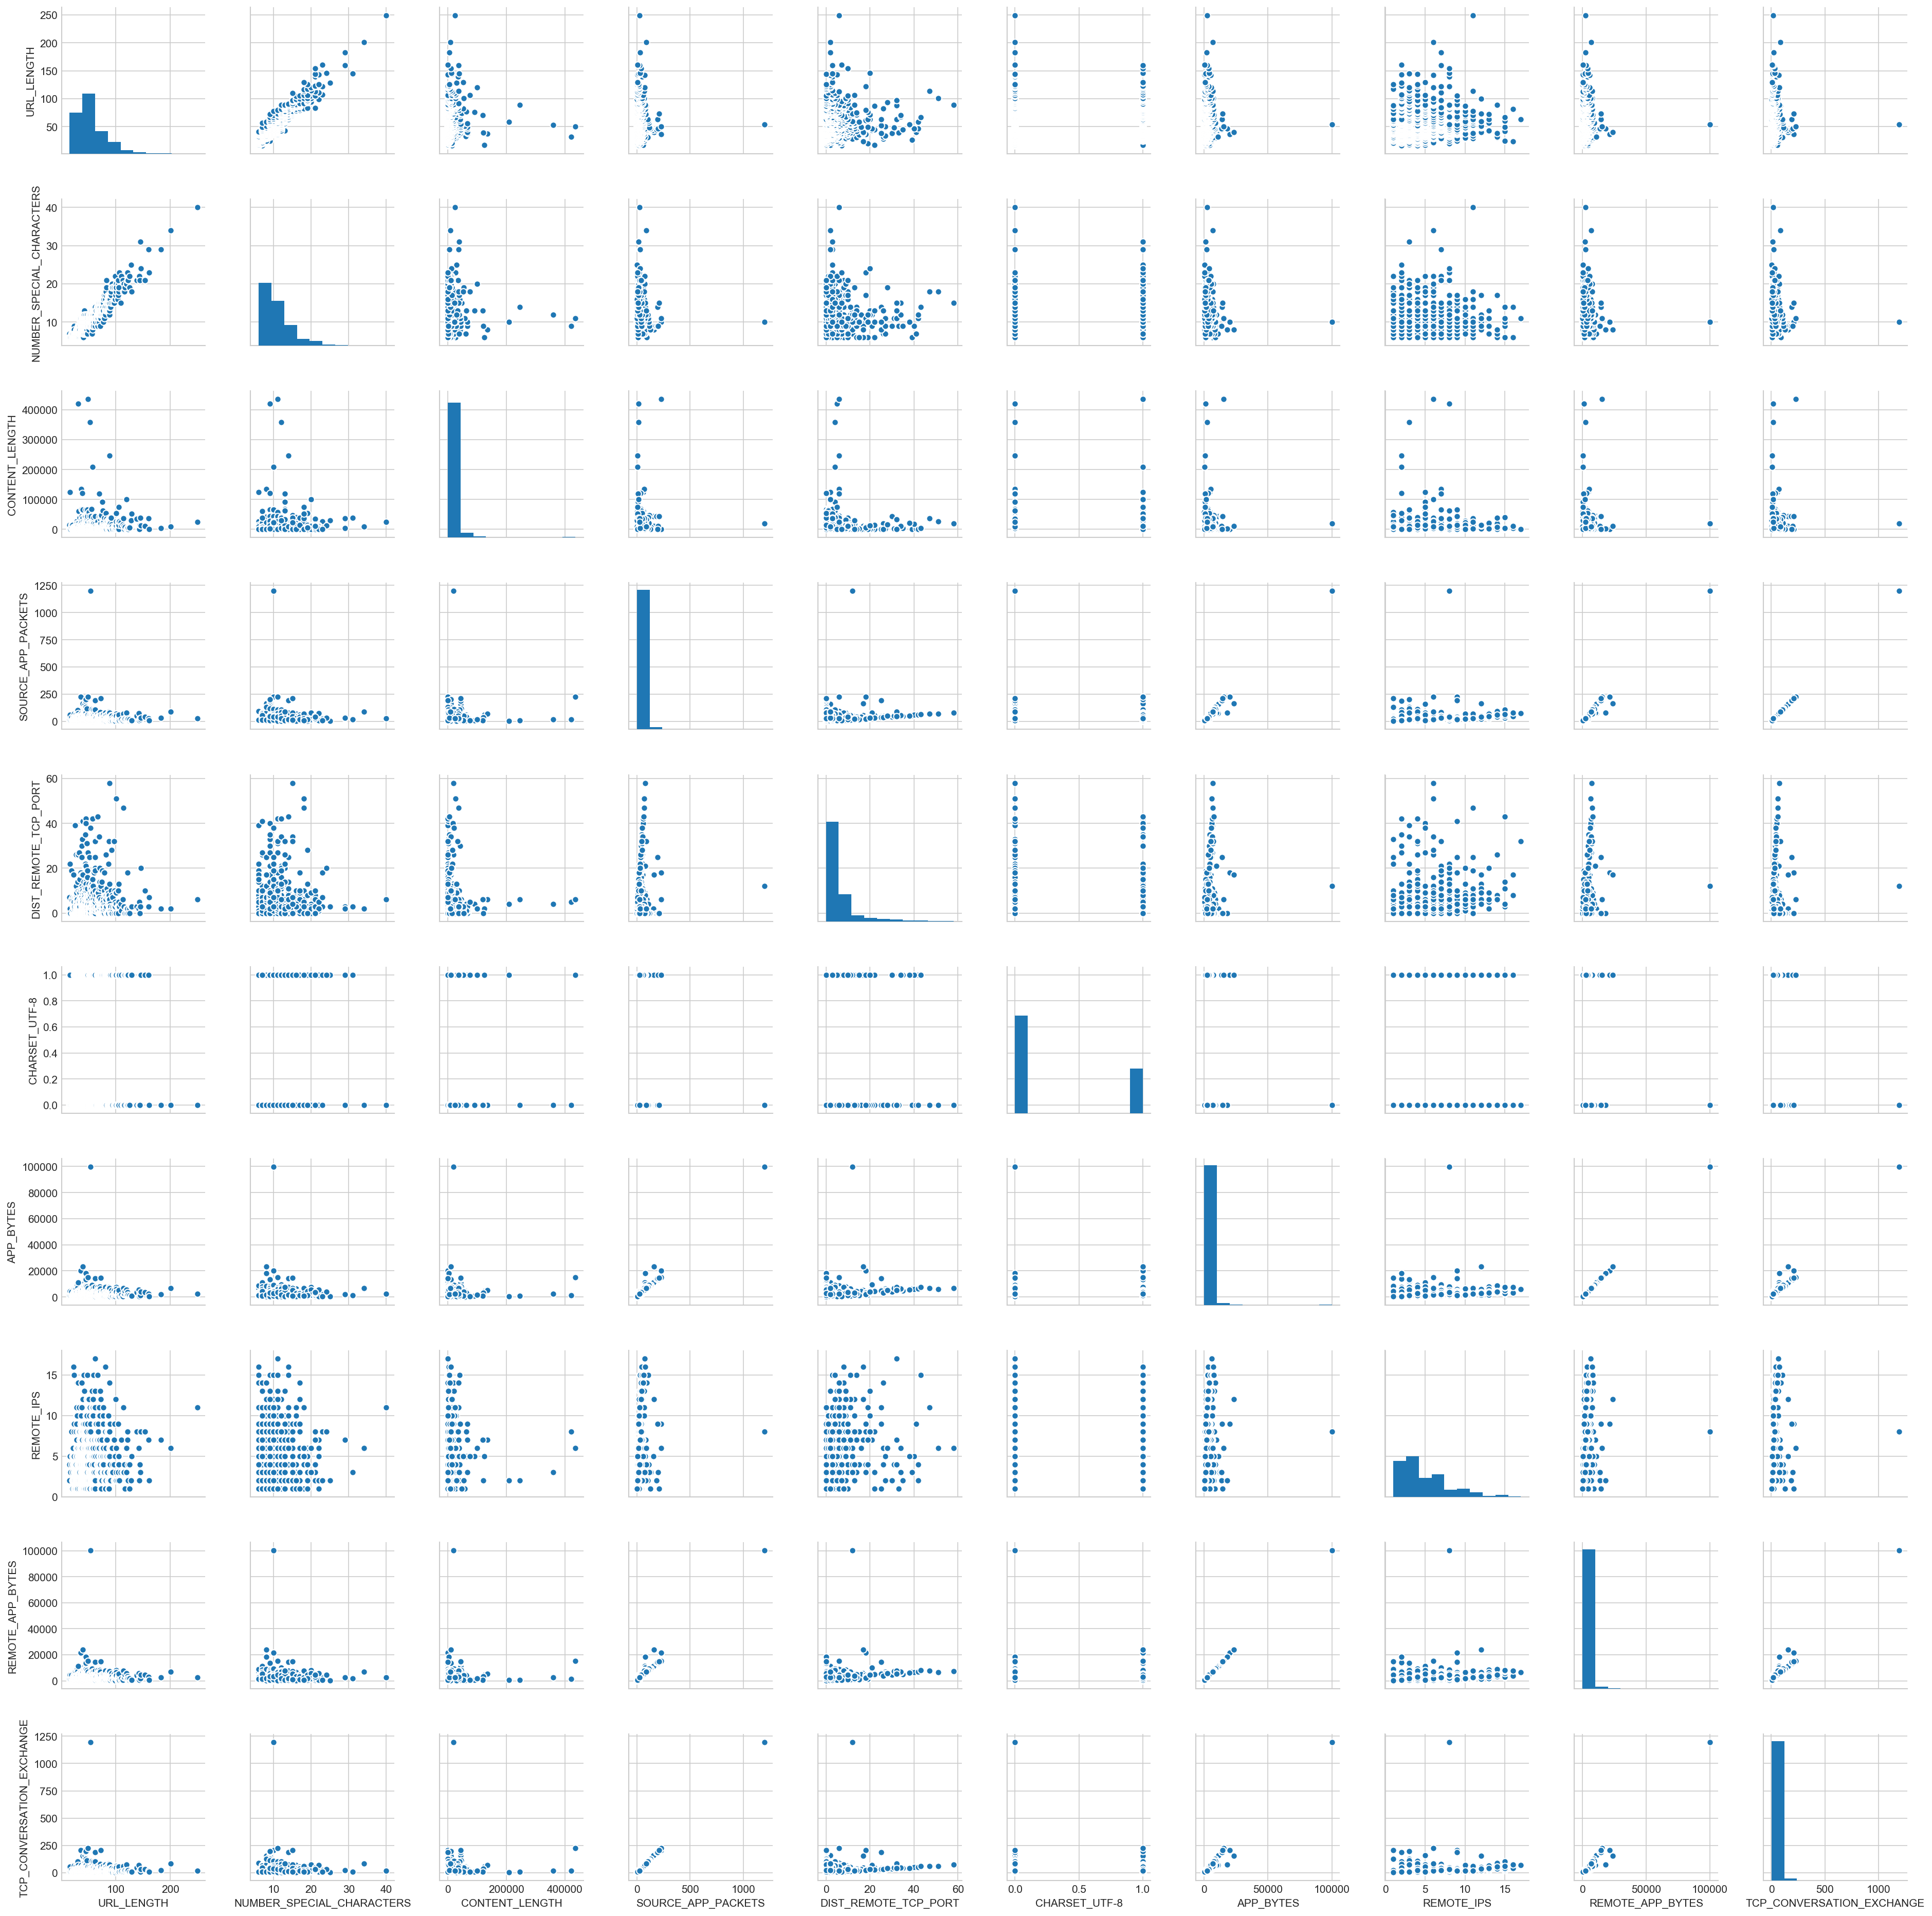

In [162]:
train_top_ten=train[['URL_LENGTH','NUMBER_SPECIAL_CHARACTERS','CONTENT_LENGTH', 'SOURCE_APP_PACKETS','DIST_REMOTE_TCP_PORT','CHARSET_UTF-8', 'APP_BYTES','REMOTE_IPS','REMOTE_APP_BYTES', 'TCP_CONVERSATION_EXCHANGE']]
sns.pairplot(train_top_ten);